# Step 1: Exploratory Data Analysis (EDA)

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading & Examining the training data


In [3]:
#Loading
train_df = pd.read_csv('train.csv')
df_copy = train_df.copy()

In [4]:
#Checking the data
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking for missing values
df_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

All the 891 entries are labeled, so there is no need to drop any row

We have 1st to convert the categorical columns into numbers

Then, we have to fill out the missing values in the Age, Embarked and Cabin columns (or maybe we can drop the cabin column due to its huge number of missing values)

In [7]:
#Describing the Data
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.Understanding Data Distribution

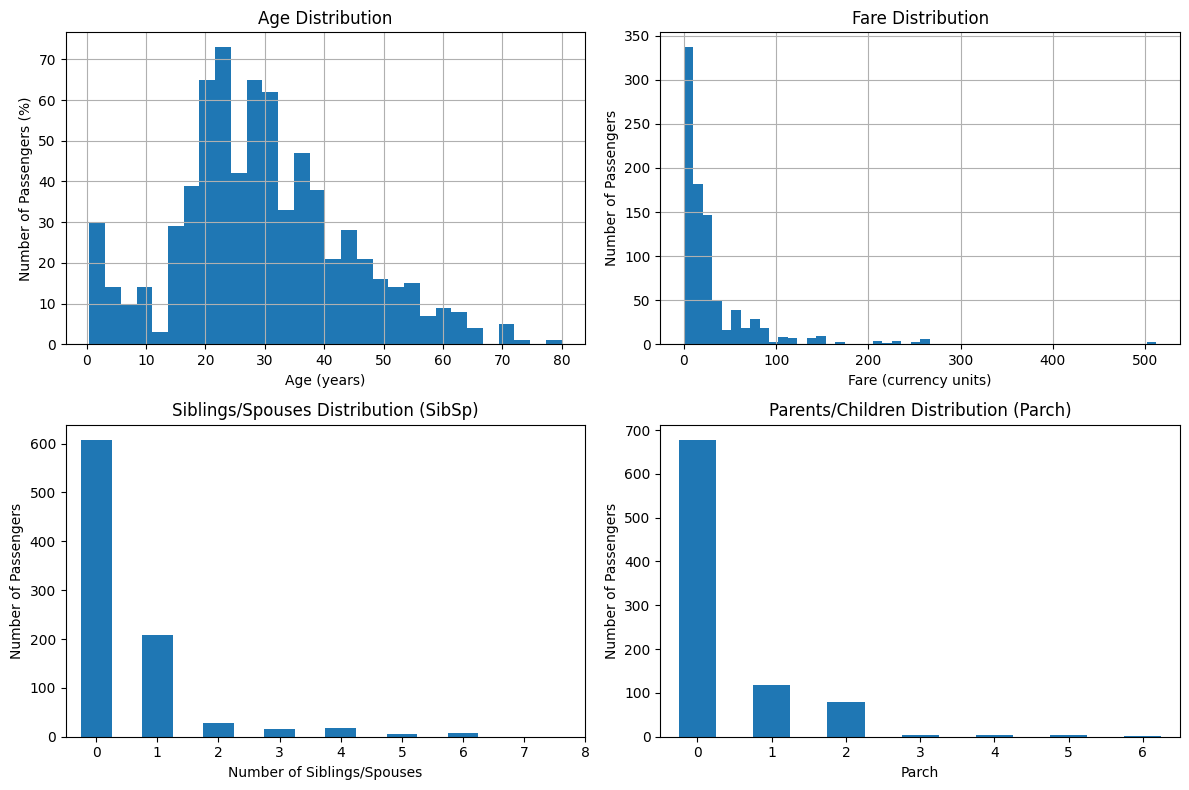

In [8]:
#Distribution of numerical features

plt.figure(figsize=(12, 8))

# Plot Age distribution
plt.subplot(2, 2, 1)  
df_copy['Age'].hist(bins=30)
plt.xlabel('Age (years)')  
plt.ylabel('Number of Passengers (%)')  
plt.title('Age Distribution')

# Plot Fare distribution
plt.subplot(2, 2, 2)
df_copy['Fare'].hist(bins=50)
plt.xlabel('Fare (currency units)')
plt.ylabel('Number of Passengers')
plt.title('Fare Distribution')

# Plot SibSp distribution
plt.subplot(2, 2, 3)
df_copy['SibSp'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=range(9), labels=range(9), rotation=0) 
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Passengers')
plt.title('Siblings/Spouses Distribution (SibSp)')


# Plot Parch distribution
plt.subplot(2, 2, 4)
df_copy['Parch'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=range(7), labels=range(7), rotation=0)  
plt.ylabel('Number of Passengers')
plt.title('Parents/Children Distribution (Parch)')

plt.tight_layout()  # To Prevent label overlap
plt.show()

### Key Observations:

Age: Most passengers were young adults (20-40 years old), with few children or elderly.

SibSp: The vast majority traveled without siblings/spouses (SibSp=0).

Fare: Fares were highly right-skewed, with most tickets under $100 and a few extreme outliers.

Parch: Nearly all passengers had no parents/children aboard (Parch=0).

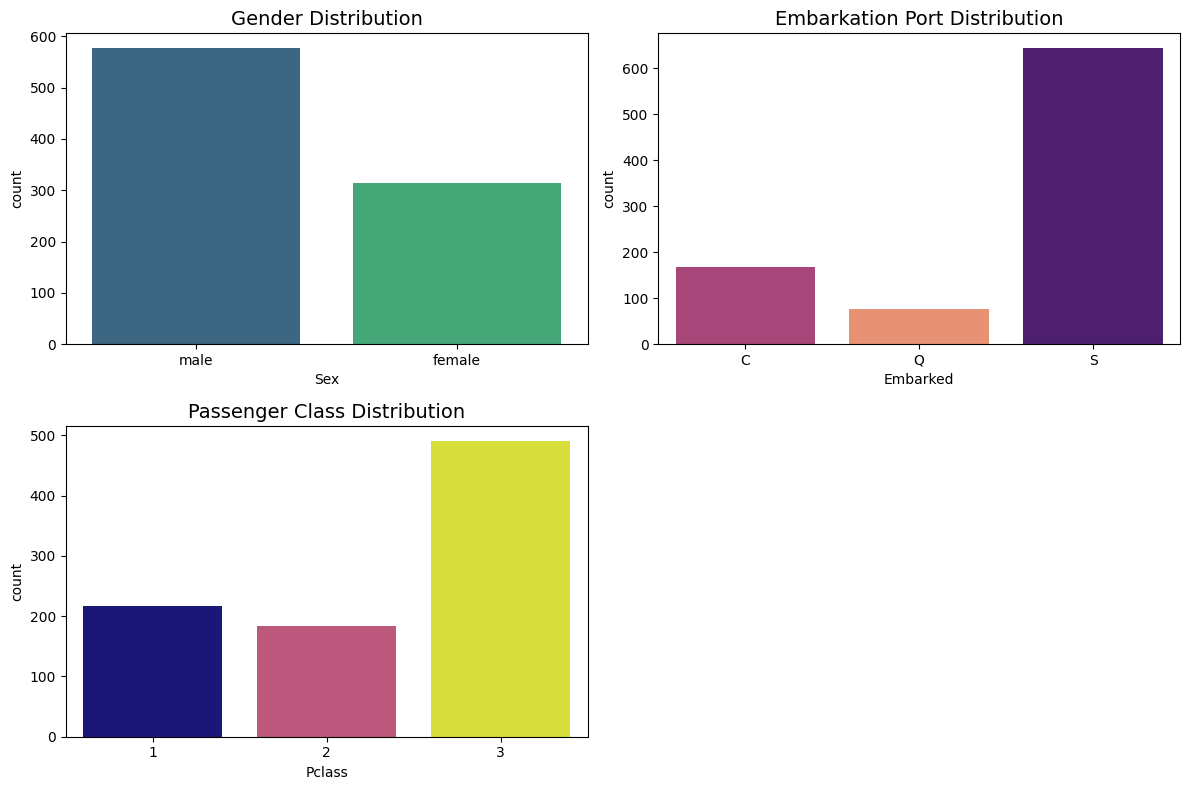

In [9]:
#Categorical feature distributions

plt.figure(figsize=(12, 8))

# Plot Sex distribution
plt.subplot(2, 2, 1)
sns.countplot(x="Sex", data=df_copy, hue="Sex", palette='viridis', legend=False)
plt.title('Gender Distribution', fontsize=14)

# Plot Embarked distribution 
plt.subplot(2, 2, 2)
sns.countplot(x="Embarked", data=df_copy, hue="Embarked", palette='magma', 
              order=['C','Q','S'], legend=False)
plt.title('Embarkation Port Distribution', fontsize=14)

# Plot Pclass distribution
plt.subplot(2, 2, 3)
sns.countplot(x="Pclass", data=df_copy, hue="Pclass", palette='plasma', legend=False)
plt.title('Passenger Class Distribution', fontsize=14)

plt.tight_layout()
plt.show()

### Key Observions

Gender Distribution: Males significantly outnumbered females (≈2:1 ratio) in the passenger list.

Passenger Class Distribution: 3rd class was the most common, followed by 1st and 2nd class.

Embarkation Port Distribution: Most passengers boarded at Southampton (S), with fewer from Cherbourg (C) and Queenstown (Q).

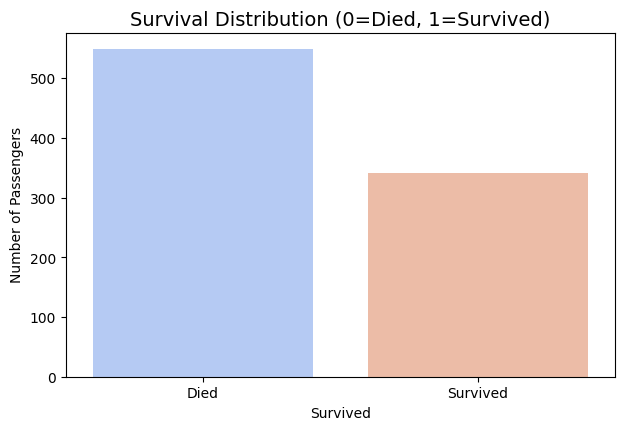

In [10]:
#Understanding Class Imbalance

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Survived', hue='Survived' , data=df_copy, palette='coolwarm', legend=False)
plt.title('Survival Distribution (0=Died, 1=Survived)', fontsize=14)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Died', 'Survived'], rotation=0)

plt.tight_layout()
plt.show()

About 38% survived and 62% died (class imbalance)



## 3. Visualizing survival rate across different features

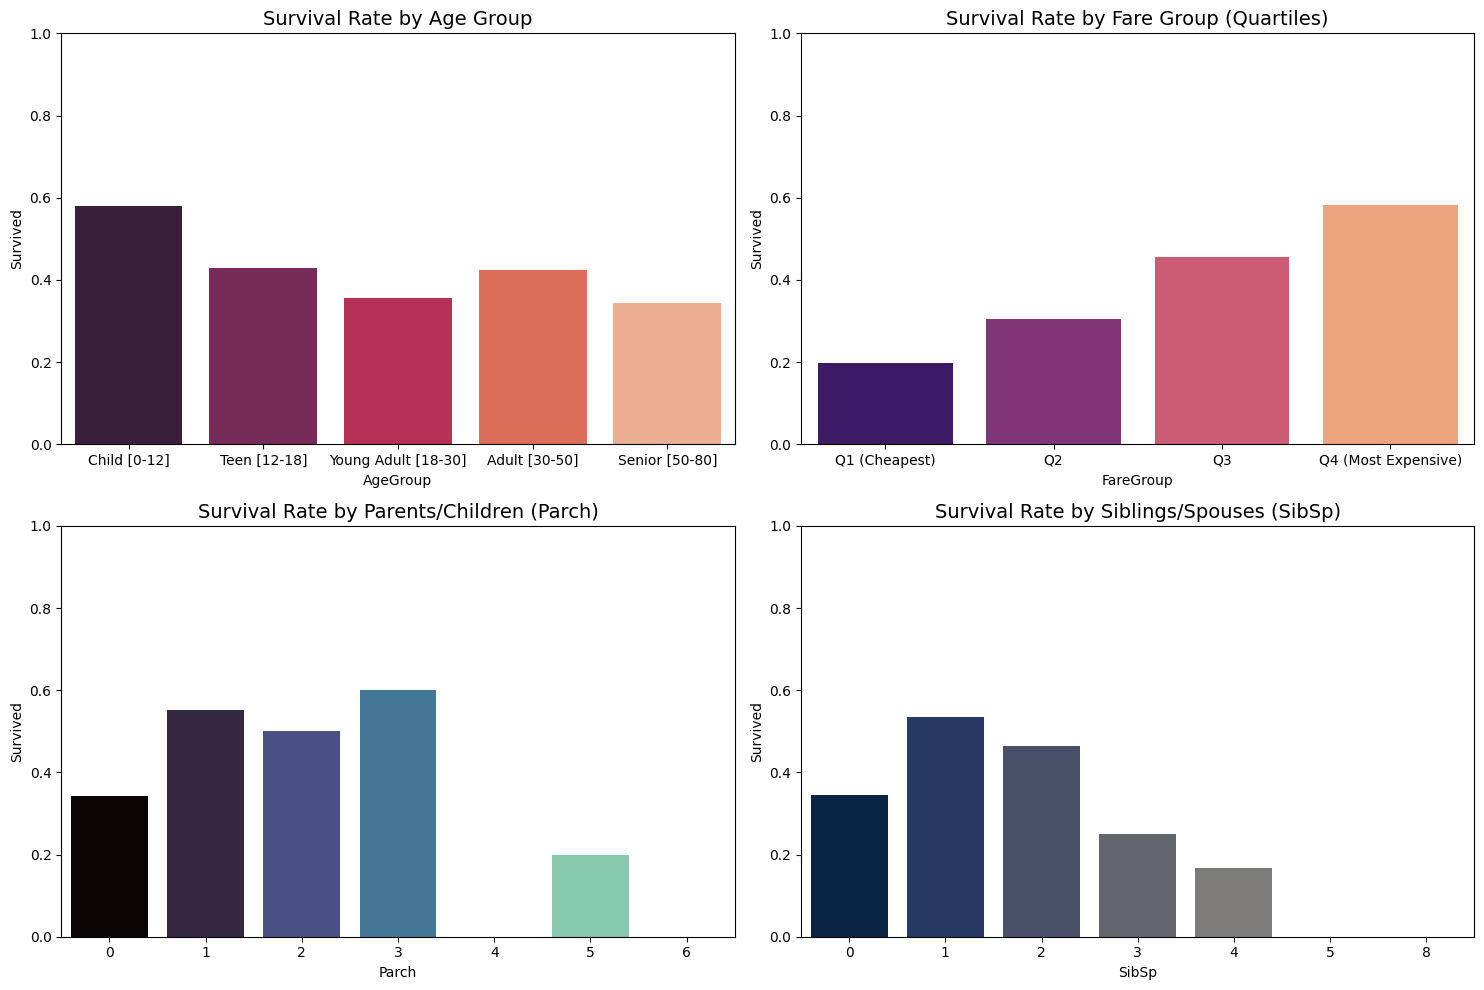

In [11]:
plt.figure(figsize=(15, 10))

# 1. Survival by Age Groups
plt.subplot(2, 2, 1)
##Groupin Age for better visualization
df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=[0, 12, 18, 30, 50, 80], 
                            labels=['Child [0-12]','Teen [12-18]','Young Adult [18-30]','Adult [30-50]','Senior [50-80]'])
sns.barplot(x='AgeGroup', hue='AgeGroup', y='Survived', data=df_copy, palette='rocket', legend=False, errorbar=None, order=['Child [0-12]','Teen [12-18]','Young Adult [18-30]','Adult [30-50]','Senior [50-80]'])
plt.title('Survival Rate by Age Group', fontsize=14)
plt.ylim(0, 1)

# 2. Survival by fare groups
plt.subplot(2, 2, 2)
##Grouping Fares
df_copy['FareGroup'] = pd.qcut(df_copy['Fare'], q=4, labels=['Q1 (Cheapest)', 'Q2', 'Q3', 'Q4 (Most Expensive)'])
sns.barplot(x='FareGroup', hue='FareGroup', y='Survived', data=df_copy, palette= 'magma', legend=False, errorbar=None, order=['Q1 (Cheapest)', 'Q2', 'Q3', 'Q4 (Most Expensive)'])
plt.title('Survival Rate by Fare Group (Quartiles)', fontsize=14)
plt.ylim(0, 1)

# 3. Survival by Parch
plt.subplot(2, 2, 3)
sns.barplot(x='Parch', hue='Parch', y='Survived', data=df_copy, palette='mako', legend=False, errorbar=None)
plt.title('Survival Rate by Parents/Children (Parch)', fontsize=14)
plt.ylim(0, 1)

# 4. Survival by SibSp
plt.subplot(2, 2, 4)
sns.barplot(x='SibSp', hue='SibSp', y='Survived', data=df_copy, palette='cividis', legend=False, errorbar=None)
plt.title('Survival Rate by Siblings/Spouses (SibSp)', fontsize=14)
plt.ylim(0, 1)

plt.tight_layout()

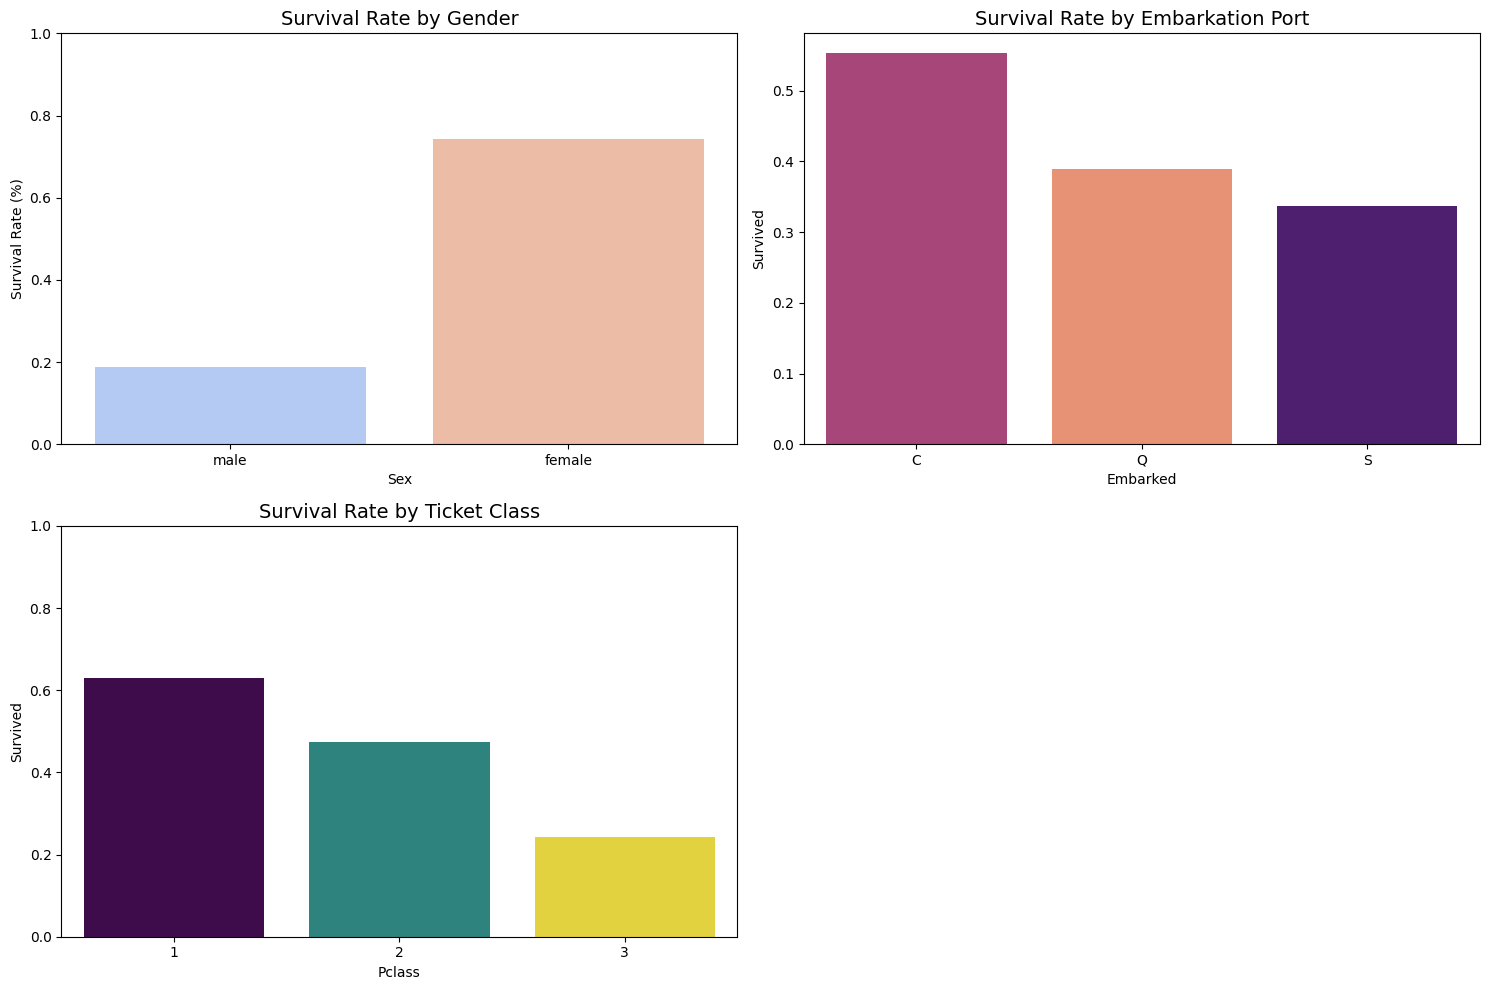

In [12]:
plt.figure(figsize=(15, 10))

# 1. Survival by Gender
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', hue='Sex', y='Survived', data=df_copy, palette='coolwarm', legend=False, errorbar=None)
plt.title('Survival Rate by Gender', fontsize=14)
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 1)

# 2. Survival by Embarkation Port
plt.subplot(2, 2, 2)
sns.barplot(x='Embarked', hue= 'Embarked', y='Survived', data=df_copy, palette='magma', legend=False, errorbar=None, order=['C', 'Q', 'S'])
plt.title('Survival Rate by Embarkation Port', fontsize=14)


# 3. Survival by Class
plt.subplot(2, 2, 3)
sns.barplot(x='Pclass', hue='Pclass', y='Survived', data=df_copy, palette='viridis', legend=False, errorbar=None)
plt.title('Survival Rate by Ticket Class', fontsize=14)
plt.ylim(0, 1)

plt.tight_layout()

### Key Observations

1. Gender: Female survival rate (~74%) was dramatically higher than males (~19%), reflecting the "women and children first" protocol.

2. Fare Group Survival: Survival rates increased steadily with fare quartiles, from ~20% in Q1 (cheapest) to ~70% in Q4 (most expensive), directly linking higher ticket prices to better survival odds.

3. Parch: Passengers with 1-3 parents/children survived most (~50-60%), while those alone or with large families fared worse.

4. SibSp: Those with 1 sibling/spouse had peak survival (~50%), while lone travelers or large groups survived less.

5. Gender: Female survival rate (~74%) was dramatically higher than males (~19%), reflecting the "women and children first" protocol.

6. Embarkation: Cherbourg (C) passengers survived most (~55%), likely due to higher 1st-class proportions.

7. Class: 1st-class passengers survived most (~63%), while 3rd-class had the lowest survival rate (~24%).

#### Pattern: Women, children, wealthy passengers (higher class/fare), and those with small families (1-3 relatives) had dramatically better survival odds.

# Step 2: Data Preprocessing

In [13]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

In [14]:
#Copying the data for processing
df_Pcopy = train_df.copy()

## 1. Dropping unneeded features

In [15]:
#Cabin
#We will drop the Cabin column because it has 77% null values
df_Pcopy = df_Pcopy.drop('Cabin', axis=1)  

In [16]:
#PassengerId
#We will drop it too
df_Pcopy = df_Pcopy.drop('PassengerId', axis=1)  

In [17]:
#We will fill the null values of Age and transform it into AgeGroup
# 1. Fill missing Age
df_Pcopy['Age'] = df_Pcopy['Age'].fillna(df_Pcopy['Age'].median())

# 2. Convert Age to AgeGroup
df_Pcopy['AgeGroup'] = pd.cut(df_Pcopy['Age'],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# 3. Drop the original Age column
df_Pcopy = df_Pcopy.drop(columns=['Age'])


## 2. Encoding categorical features 

In [18]:
#Name 
# Extracting titles from 'Name' (e.g., "Mr", "Miss")
df_Pcopy['Title'] = df_Pcopy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Consolidate rare titles 
df_Pcopy['Title'] = df_Pcopy['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Rev', 'Dr', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_Pcopy['Title'] = df_Pcopy['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_Pcopy['Title'] = df_Pcopy['Title'].replace('Mme', 'Mrs')

# Now, we will drop the original 'Name' column
df_Pcopy = df_Pcopy.drop('Name', axis=1)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\USER\AppData\Local\Temp\ipykernel_17004\3065387757.py:3: SyntaxWarning: invalid escape sequence '\.'
  df_Pcopy['Title'] = df_Pcopy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [19]:
#Ticket
# Extract ticket prefix (e.g., "PC" from "PC 17610")
df_Pcopy['TicketPrefix'] = df_Pcopy['Ticket'].str.split().str[0].str.replace('[^A-Za-z]', '', regex=True).str.upper()

# Flag numeric-only tickets (e.g., "347082")
df_Pcopy['IsNumericTicket'] = df_Pcopy['Ticket'].str.isnumeric().astype(int)

# Save extracted features for potential later use
ticket_features = df_Pcopy[['TicketPrefix', 'IsNumericTicket']].copy()

#Dropping the Original Ticket Column
df_Pcopy = df_Pcopy.drop('Ticket', axis=1)

In [20]:
categorical_features = ['AgeGroup', 'Title', 'Sex', 'Embarked', 'TicketPrefix']

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), #for embarked
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## 3. Pipeline for numerical features

In [21]:
numerical_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'IsNumericTicket']

from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()) #Standardizing the numerical features
])

## 4. Putting all trnasformer Pipelines into a single ColumnTransformer instance

In [22]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

# Step 3: Model Building

In [23]:
#1. Splitting the data

# Create X (all columns except Survived[target])
X = df_Pcopy.drop("Survived", axis=1)

# Create y (only the target column)
y = df_Pcopy["Survived"]

In [24]:
#2. Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [26]:
#3. Preparing Models

#Importing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [67]:
# Create a dictionary called models which contains all of the classification models we've imported
classification_models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(
        random_state=42,
        max_features='sqrt',  # More consistent feature selection
        n_estimators=200      # Reduce variance with more trees
    ),
    'XGBClassifier': XGBClassifier(random_state=42)
}

# Create an empty dictionary called results
classification_results = {}

In [70]:
for model_name, model in classification_models.items():

    model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)])

    model_pipeline.fit(X_train, y_train)

    classification_results[model_name] = model_pipeline.score(X_test, y_test)

In [71]:
#printing results
for model_name, score in classification_results.items():
    print(f"{model_name} accuracy: {score:.2%}")

LogisticRegression accuracy: 81.56%
RandomForestClassifier accuracy: 82.68%
XGBClassifier accuracy: 83.24%


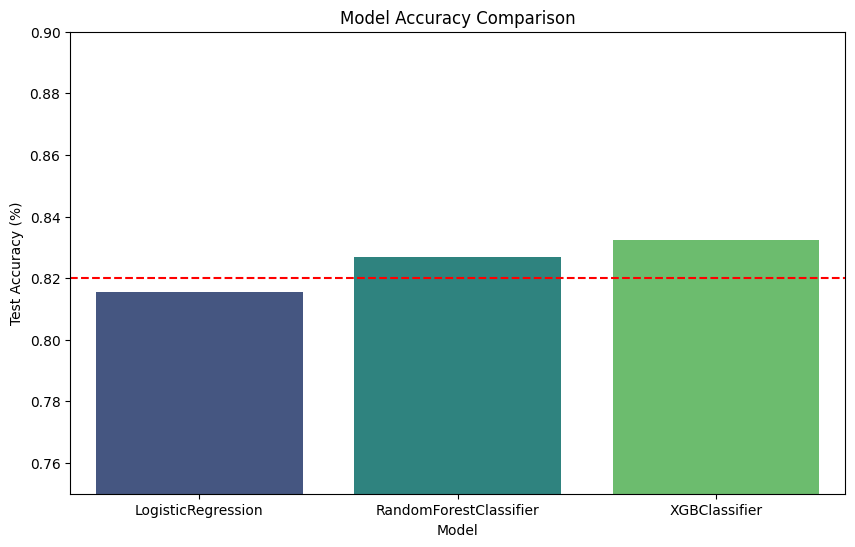

In [73]:
#Visualize the results

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(classification_results, 
                                  orient='index',
                                  columns=['Accuracy']).reset_index()
results_df.columns = ['Model', 'Accuracy']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', hue='Model', y='Accuracy', data=results_df, palette='viridis', errorbar=None)
plt.ylim(0.75, 0.90)  # Focus on meaningful range
plt.title('Model Accuracy Comparison')
plt.ylabel('Test Accuracy (%)')
plt.axhline(y=0.82, color='red', linestyle='--')  # Baseline reference
plt.show()

# Step 4: Evaluating the XGBClassifier 

In [75]:
#Cross Validation
from sklearn.model_selection import cross_validate


# Creating full pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        enable_categorical=False  
    ))
])

#Runing cross validation
cv_results = cross_validate(
    xgb_pipeline,  
    X_train,      
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall']
)

# Print results
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2%}")
print(f"Precision: {cv_results['test_precision'].mean():.2%}")
print(f"Recall: {cv_results['test_recall'].mean():.2%}")

Accuracy: 81.61%
Precision: 78.51%
Recall: 71.65%


In [77]:
from sklearn.metrics import classification_report

# 1. Train final model
xgb_pipeline.fit(X_train, y_train)

# 2. Get predictions
y_pred = xgb_pipeline.predict(X_test)

# 3. Print report
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.84      0.88      0.86       105
    Survived       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



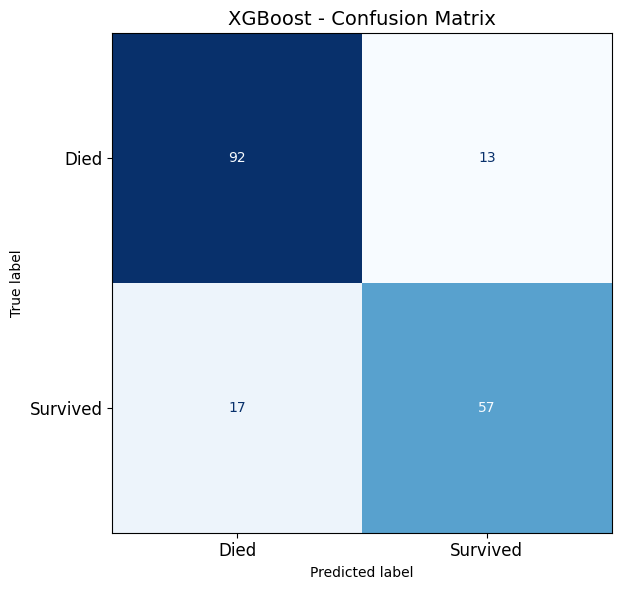

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix 
fig, ax = plt.subplots(figsize=(8, 6))  
ConfusionMatrixDisplay.from_estimator(
    xgb_pipeline, 
    X_test, 
    y_test,
    display_labels=['Died', 'Survived'],
    cmap='Blues',
    ax=ax,
    colorbar=False  
)
plt.title('XGBoost - Confusion Matrix', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

# Step 5: Saving the Model

In [80]:
from joblib import dump

# Save the entire pipeline (including preprocessing steps)
dump(xgb_pipeline, 'xgb_model.joblib') 

['xgb_model.joblib']